In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets

Generate training data with 2 features from datasets and preview the two features.

Size of X : (200, 2)
Size of Y : (200,)


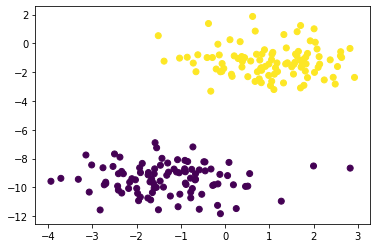

In [2]:
X,Y = datasets.make_blobs(n_samples=200, n_features=2, centers=2, random_state=2)
print("Size of X : {}".format(X.shape))
print("Size of Y : {}".format(Y.shape))
plt.scatter(X[:,0], X[:,1], c=Y)

Write a function to plot the classification boundary

In [3]:
import numpy as np
def plotDecisionBoundary(estimator, data, label):
    h = .02  # step size in the mesh
    # create a mesh to plot in
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    test_x = np.array([x1 for x1 in zip(xx.ravel(), yy.ravel())])
    test_y = estimator.predict_proba(test_x)

    plt.contourf(xx, yy, test_y[:,1].reshape(xx.shape), alpha=0.3)
    plt.scatter(data[:,0], data[:,1], c=label)

First, model the data usign logistic regression.

In [4]:
from sklearn import linear_model
from sklearn import metrics
lm_lr = linear_model.LogisticRegression()
lm_lr.fit(X, Y)
print('Confusion matrix: \n', metrics.confusion_matrix(Y, lm_lr.predict(X)))

Confusion matrix: 
 [[100   0]
 [  0 100]]


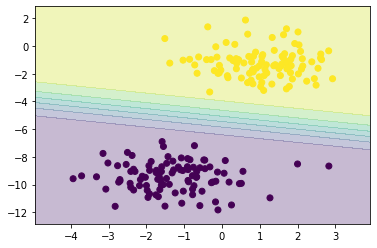

In [5]:
plotDecisionBoundary(lm_lr, X, Y)

Then, model the data with decision tree algorithm. 

In [6]:
from sklearn import tree

In [7]:
t_dtc = tree.DecisionTreeClassifier()
t_dtc.fit(X, Y)
print('Confusion matrix: \n', metrics.confusion_matrix(Y, t_dtc.predict(X)))

Confusion matrix: 
 [[100   0]
 [  0 100]]


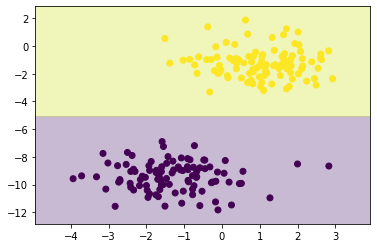

In [8]:
plotDecisionBoundary(t_dtc, X, Y)

Use heatmap to visualize correlation matrix.

In [ ]:
def plot_corr(df,size=15):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    cax = ax.matshow(corr,cmap=plt.get_cmap('rainbow'))
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.colorbar(cax)
plot_corr(train_data)

In [ ]:
import seaborn as sns
corr_matrix = train_data.corr()
plt.figure(figsize=(20,20))
# sns.heatmap(corr_matrix, linewidths=.5)

ax = sns.heatmap(
    corr_matrix, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(10, 150, n=200),
    square=True,
    cbar_kws={"shrink": 0.8}
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);